# 시계열 분석

시간성
    - 다중 공선성과 자기 상관성 ( 시계열분석 )
        - 자기 상관계수 sigma (x(t) - x(t-1)) * (yi - ybar)
        - (n-1)
        - sigmax * sigmay
        - (-1 ~ 1) 사이의 값을 갖는다 = 내적과 의미가 같다.
    - RNN (Recurrent Neural Network)
        - 시간성 : 경제성장율(숫자)
        - Text Mining
        - Speech, Chatbot, 번역 ...
    - 자기 상관성이 있으면 시계열 분석으로 예측
    - 선형회귀 : 등분산성, 독립성, 선형성, 정규성
        - Tree
    - 정상성 / 비정상성
        - 정상성 : 평균, 분산, 공분산
        - 데이터 변환 : 제곱, 루트, log ==> 정규분포
    - 주파수가 높은 것들 : 규칙 탐색 곤란
    - 저주파수 (5일, 10일, 20일, 60일, 120일, 240일)
    - 이동평균법(Moving Average)
        - 단순이동평균법, 가중이동평균법, 지수이동평균법
    - 차분(Diff) : 미분의 역할. Lag(시차)
        - 시간에 대한 학습 필요.
        - Index, Datetime, PeriodIntdex, IntervalIndex
    - ARMA(Auto Regression Moving Average)
    - ARIMA() : 비정상성을 띄 데이터도 분석이 가능
        - 선형선
    - SARIMA : Seasonal. 계절적변동 주기성
    - VARIMA : Vector
    - 시계열 데이터의 시각화.

시계열 분석 하는 이유 - 예측(Forecast)
    - 자기상관성(ACF), 부분자기상관성(PACF)
    - 가법모형(변수간 덧셈)과 승법모형(곱셈)
    - 평가
        - MSE(Mean Squared Error, 연속적 수치) : 잔차의 제곱 평균. Sigma(실제값 - 예측값)^2 / n
        - RMSE(Root) : MSE에 루트
        - MAE(Mean Absolute Error) : MSE의 절대값.

In [5]:
import datetime
date = datetime.date(year = 2013, month = 6, day = 7)
time = datetime.time(hour = 12, minute = 30, second = 19, microsecond = 463198)
dt = datetime.datetime(year = 2013, month = 6, day = 7, hour = 12, minute = 30, second = 19, microsecond = 463198)

print('date : ', date)
print('time : ', time)
print('datetime : ', datetime)

td = datetime.timedelta(weeks=2, days=5, hours=10, minutes=20, seconds=6.73, milliseconds=99, microseconds=8)
print(td)

print('시간합 : ', date + td)
print('새로운 시간 : ', dt + td)

date :  2013-06-07
time :  12:30:19.463198
datetime :  <module 'datetime' from 'C:\\Users\\user\\anaconda3\\lib\\datetime.py'>
19 days, 10:20:06.829008
시간합 :  2013-06-26
새로운 시간 :  2013-06-26 22:50:26.292206


In [6]:
import time
# timestamp : linux 2000.01.01 부터의 경과 시간 표현.

print(time.time())
print(time.localtime())
yesterday = time.localtime(time.time() - 60*60*24)
print(yesterday)

1600737418.285425
time.struct_time(tm_year=2020, tm_mon=9, tm_mday=22, tm_hour=10, tm_min=16, tm_sec=58, tm_wday=1, tm_yday=266, tm_isdst=0)
time.struct_time(tm_year=2020, tm_mon=9, tm_mday=21, tm_hour=10, tm_min=16, tm_sec=58, tm_wday=0, tm_yday=265, tm_isdst=0)


In [19]:
dt = datetime.datetime.now()
print(dt.year, dt.month, dt.day, dt.hour, dt.minute, dt.second, dt.microsecond)
print(dt.strftime('%A %D. %B %Y'))
dt.timestamp()

2020 9 22 10 23 59 232813
Tuesday 09/22/20. September 2020


1600737839.232813

In [23]:
from dateutil.parser import parse
print(parse('2020-07-19'))
print(parse('Apr 16, 2016 04:05:32 PM'))

delta = datetime.datetime(2015, 1, 7) - datetime.datetime(2010, 6, 24, 8, 15)
print('시간차는 : ', delta, delta.days, delta.seconds)

2020-07-19 00:00:00
2016-04-16 16:05:32
시간차는 :  1657 days, 15:45:00 1657 56700


In [27]:
import numpy as np
import pandas as pd
date = np.array('2015-07-04', dtype=np.datetime64)
date + np.arange(12)

array(['2015-07-04', '2015-07-05', '2015-07-06', '2015-07-07',
       '2015-07-08', '2015-07-09', '2015-07-10', '2015-07-11',
       '2015-07-12', '2015-07-13', '2015-07-14', '2015-07-15'],
      dtype='datetime64[D]')

In [29]:
# pandas :  DatetimeIndex, TimeDeltaIndex, PeriodIndex, IntervalIndex, date_range, to_datetime
index = pd.DatetimeIndex(['2014-07-04', '2014-08-04', '2015-07-04', '2015-08-04'])
data = pd.Series([0,1,2,3], index = index)
data

2014-07-04    0
2014-08-04    1
2015-07-04    2
2015-08-04    3
dtype: int64

In [31]:
data['2014-07-04':'2015-07-04']

2014-07-04    0
2014-08-04    1
2015-07-04    2
dtype: int64

In [32]:
data['2015']

2015-07-04    2
2015-08-04    3
dtype: int64

In [34]:
# DatetimeIndex 생성
dates = pd.to_datetime([datetime.datetime(2015, 7, 3), '4th of July, 2015', '2015-Jul-6', '07-07-2015', '20150708'])
dates

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-06', '2015-07-07',
               '2015-07-08'],
              dtype='datetime64[ns]', freq=None)

In [37]:
# PeriodIndex로 변경
dates.to_period('D')

PeriodIndex(['2015-07-03', '2015-07-04', '2015-07-06', '2015-07-07',
             '2015-07-08'],
            dtype='period[D]', freq='D')

In [38]:
# TimedeltaIndex 로 변경
dates - dates[0]

TimedeltaIndex(['0 days', '1 days', '3 days', '4 days', '5 days'], dtype='timedelta64[ns]', freq=None)

In [39]:
# 시작점과 종료점을 이용하여 날짜 생성
pd.date_range('2015-07-03', '2015-07-10')

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-05', '2015-07-06',
               '2015-07-07', '2015-07-08', '2015-07-09', '2015-07-10'],
              dtype='datetime64[ns]', freq='D')

In [43]:
# 초기값과 주기로 생성
pd.date_range('2015-07-03', periods = 8)
pd.date_range('2015-07-03', periods = 8, freq = 'H')
pd.date_range('2015-07-03', periods = 8, freq = 'M')

DatetimeIndex(['2015-07-31', '2015-08-31', '2015-09-30', '2015-10-31',
               '2015-11-30', '2015-12-31', '2016-01-31', '2016-02-29'],
              dtype='datetime64[ns]', freq='M')

In [45]:
pd.timedelta_range(0, periods=10, freq='H')
pd.timedelta_range(0, periods=10, freq='2H30T')

TimedeltaIndex(['00:00:00', '02:30:00', '05:00:00', '07:30:00', '10:00:00',
                '12:30:00', '15:00:00', '17:30:00', '20:00:00', '22:30:00'],
               dtype='timedelta64[ns]', freq='150T')

In [47]:
from pandas.tseries.offsets import BDay
pd.date_range('2015-07-01', periods = 5, freq=BDay())

DatetimeIndex(['2015-07-01', '2015-07-02', '2015-07-03', '2015-07-06',
               '2015-07-07'],
              dtype='datetime64[ns]', freq='B')

In [48]:
pd.Series(range(3), index=pd.date_range('2000', freq='D', periods=3))

2000-01-01    0
2000-01-02    1
2000-01-03    2
Freq: D, dtype: int64

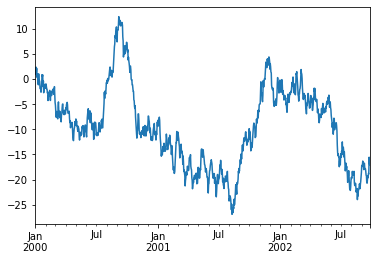

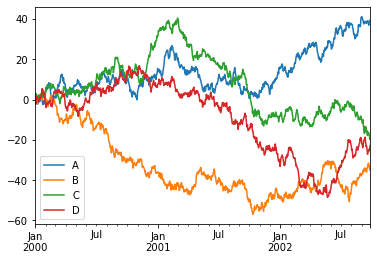

In [51]:
# cumsum은 배열에서 주어진 축에 따라 누적되는 원소들의 누적 합을 계산하는 함수.

ts = pd.Series(np.random.randn(1000), index = pd.date_range('1/1/2000', periods=1000))
ts = ts.cumsum()
ts.plot()

df = pd.DataFrame(np.random.randn(1000, 4), index = ts.index, columns = list('ABCD'))
df = df.cumsum()
df.plot()

  subject  timepoint event    region    signal
0     s13         18  stim  parietal -0.017552
1      s5         14  stim  parietal -0.080883
2     s12         18  stim  parietal -0.081033
3     s11         18  stim  parietal -0.046134
4     s10         18  stim  parietal -0.037970


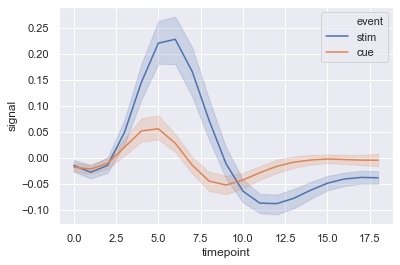

In [54]:
# lineplot, relplot (relation(x,y))

import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
fmri = sns.load_dataset('fmri')
print(fmri.head())
ax = sns.lineplot(x='timepoint', y = 'signal', hue='event', data=fmri)

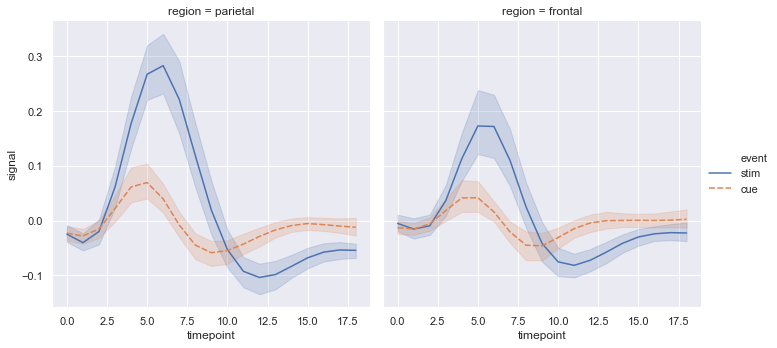

In [57]:
g = sns.relplot(x='timepoint', y = 'signal', col = 'region', hue='event', style = 'event', kind='line', data=fmri)

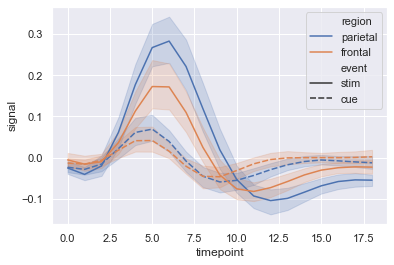

In [59]:
sns.lineplot(x='timepoint', y = 'signal', hue='region', style = 'event', data=fmri)

In [64]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


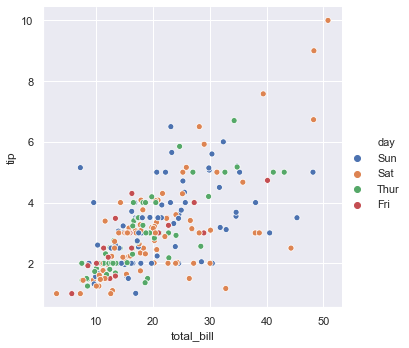

In [63]:
sns.relplot(data=tips, x='total_bill', y='tip', hue = 'day')

### 문제

Hue 와 Col 을 이용하여 8가지 경우(Day : 4, Time : 2 에 따른) 를 relation plot 하시오.

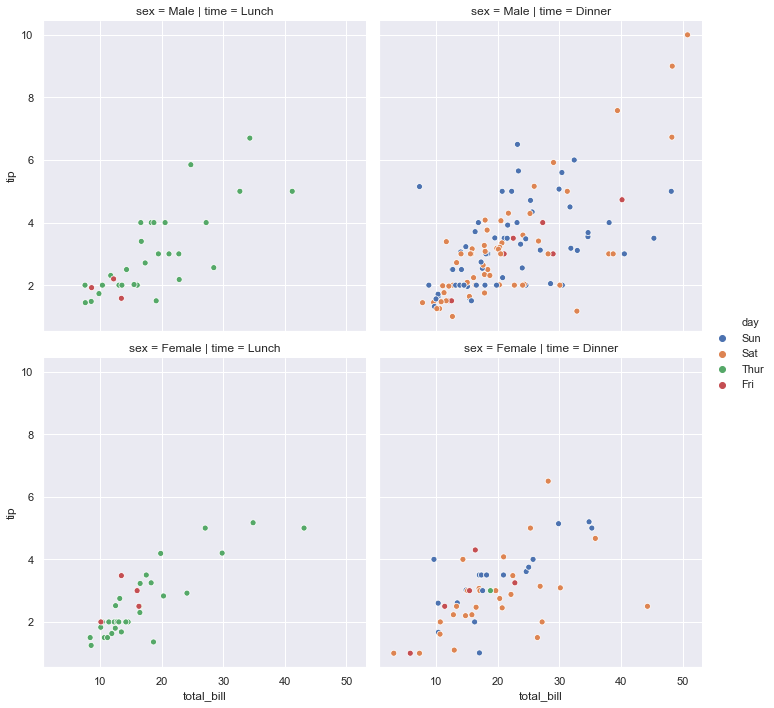

In [65]:
sns.relplot(data=tips, x='total_bill', y='tip', hue = 'day', col = 'time', row='sex')

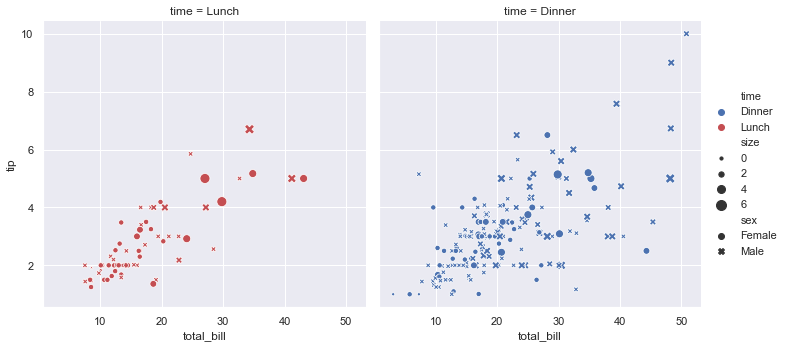

In [68]:
# 팔레트
# FaceGrid. 다차원으로 시각화.

sns.relplot(
    data=tips, x='total_bill', y='tip', 
    hue = 'time', col = 'time', size = 'size',
    style = 'sex', palette = ['b', 'r'], sizes = (10, 100))

In [71]:
np.random.seed(0)
ts = pd.Series(np.random.randn(4),
              index = pd.date_range('2019-1-1', periods = 4, freq = 'M')) #(range, arange, date_range)
print(type(ts))
print(ts.index)
ts

<class 'pandas.core.series.Series'>
DatetimeIndex(['2019-01-31', '2019-02-28', '2019-03-31', '2019-04-30'], dtype='datetime64[ns]', freq='M')


2019-01-31    1.764052
2019-02-28    0.400157
2019-03-31    0.978738
2019-04-30    2.240893
Freq: M, dtype: float64

## shift

2진수 : Shift(8비트. 256가지.)
    - left Shift (곱하기)
    - right Shift (나누기)
    
시계열 데이터

In [74]:
# Shift를 하는 이유
# 시계열 데이터의 비정상성을 띄는 데이터에 대하여
# 차분, Power, sqrt, log 를 사용하여 정상성을 띄는 데이터로 변환하기 위함.

print(ts.shift(1))
ts.shift(-1)

2019-01-31         NaN
2019-02-28    1.764052
2019-03-31    0.400157
2019-04-30    0.978738
Freq: M, dtype: float64


2019-01-31    0.400157
2019-02-28    0.978738
2019-03-31    2.240893
2019-04-30         NaN
Freq: M, dtype: float64

In [77]:
ts = pd.Series(np.random.randn(100), index=pd.date_range('2019-03-01', periods=100, freq='D'))
print(ts.head(20))

ts.resample('W').mean() # Day 기준 데이터를 Week로 Resampling

2019-03-01    0.640132
2019-03-02   -1.616956
2019-03-03   -0.024326
2019-03-04   -0.738031
2019-03-05    0.279925
2019-03-06   -0.098150
2019-03-07    0.910179
2019-03-08    0.317218
2019-03-09    0.786328
2019-03-10   -0.466419
2019-03-11   -0.944446
2019-03-12   -0.410050
2019-03-13   -0.017020
2019-03-14    0.379152
2019-03-15    2.259309
2019-03-16   -0.042257
2019-03-17   -0.955945
2019-03-18   -0.345982
2019-03-19   -0.463596
2019-03-20    0.481481
Freq: D, dtype: float64


2019-03-03   -0.333717
2019-03-10    0.141578
2019-03-17    0.038392
2019-03-24   -0.202421
2019-03-31   -0.576516
2019-04-07    0.039165
2019-04-14   -0.142443
2019-04-21   -0.044605
2019-04-28   -0.767644
2019-05-05   -0.200177
2019-05-12   -0.082452
2019-05-19    0.238809
2019-05-26    0.346379
2019-06-02    0.349213
2019-06-09   -0.079355
Freq: W-SUN, dtype: float64

In [79]:
# 분단위 T
ts = pd.Series(np.random.randn(60), index=pd.date_range('2018-01-01', periods=60, freq='T'))
print(ts.head(5))

ts.resample('10T').sum()

2018-01-01 00:00:00   -0.015682
2018-01-01 00:01:00    0.160928
2018-01-01 00:02:00   -0.190653
2018-01-01 00:03:00   -0.394850
2018-01-01 00:04:00   -0.267734
Freq: T, dtype: float64


2018-01-01 00:00:00   -1.956511
2018-01-01 00:10:00   -4.299598
2018-01-01 00:20:00   -3.888358
2018-01-01 00:30:00    2.673232
2018-01-01 00:40:00   -2.721131
2018-01-01 00:50:00    5.710542
Freq: 10T, dtype: float64

In [80]:
ts.resample('5T').ohlc() #open, high, low, close

,open,high,low,close
2018-01-01 00:00:00,-0.015682,0.160928,-0.394850,-0.267734
2018-01-01 00:05:00,-1.128011,0.841631,-1.128011,-0.249459
2018-01-01 00:10:00,0.049495,0.643314,-1.570623,-0.206904
2018-01-01 00:15:00,0.880179,0.880179,-2.255564,-1.022507
2018-01-01 00:20:00,0.038631,1.648135,-1.656715,1.648135
2018-01-01 00:25:00,0.164228,0.567290,-1.616474,-1.616474
2018-01-01 00:30:00,-0.291837,1.466579,-0.761492,1.466579
2018-01-01 00:35:00,0.852552,0.852552,-1.115897,0.356293
2018-01-01 00:40:00,-1.768538,0.814520,-1.768538,-0.185054
2018-01-01 00:45:00,-0.807648,0.800298,-1.446535,-0.233467


In [85]:
# forward fill, backward fill
# 없는 데이터를 채워줌
# 30s 단위로 바꿔주면 DatetimeIndex가 늘어나는데 데이터는 없으므로.

ts.resample('30s').ffill().head(20)

2018-01-01 00:00:00   -0.015682
2018-01-01 00:00:30   -0.015682
2018-01-01 00:01:00    0.160928
2018-01-01 00:01:30    0.160928
2018-01-01 00:02:00   -0.190653
2018-01-01 00:02:30   -0.190653
2018-01-01 00:03:00   -0.394850
2018-01-01 00:03:30   -0.394850
2018-01-01 00:04:00   -0.267734
2018-01-01 00:04:30   -0.267734
2018-01-01 00:05:00   -1.128011
2018-01-01 00:05:30   -1.128011
2018-01-01 00:06:00    0.280442
2018-01-01 00:06:30    0.280442
2018-01-01 00:07:00   -0.993124
2018-01-01 00:07:30   -0.993124
2018-01-01 00:08:00    0.841631
2018-01-01 00:08:30    0.841631
2018-01-01 00:09:00   -0.249459
2018-01-01 00:09:30   -0.249459
Freq: 30S, dtype: float64

In [88]:
import pandas_datareader.data as web
gs = web.DataReader('078930.KS', 'yahoo', '2014-01-01', '2016-03-06')
gs

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2014-01-02,58300.0,56000.0,58200.0,56400.0,247497.0,48250.261719
2014-01-03,56700.0,55100.0,56500.0,55700.0,220482.0,47651.410156
2014-01-06,55800.0,54600.0,55400.0,55500.0,190935.0,47480.308594
2014-01-07,55600.0,54900.0,55000.0,55100.0,179610.0,47138.109375
2014-01-08,55400.0,53700.0,55300.0,54300.0,374566.0,46453.707031
...,...,...,...,...,...,...
2016-02-26,54500.0,53200.0,54300.0,53300.0,159453.0,48372.046875
2016-02-29,53900.0,52800.0,53000.0,53000.0,154692.0,48099.785156
2016-03-02,55200.0,53500.0,53900.0,55100.0,229999.0,50005.625000


In [89]:
# 이동평균법
ma5 = gs['Adj Close'].rolling(window=5).mean()
ma5.head(6)

Date
2014-01-02             NaN
2014-01-03             NaN
2014-01-06             NaN
2014-01-07             NaN
2014-01-08    47394.759375
2014-01-09    46984.117969
Name: Adj Close, dtype: float64

In [104]:
new_gs = gs[gs['Volume'] !=0] #filtering

ma20 = new_gs['Adj Close'].rolling(window=20).mean()
ma60 = new_gs['Adj Close'].rolling(window=60).mean()
ma120 = new_gs['Adj Close'].rolling(window=120).mean()

new_gs.insert(len(new_gs.columns), 'MA20', ma20)
new_gs.insert(len(new_gs.columns), 'MA60', ma60)
new_gs.insert(len(new_gs.columns), 'MA120', ma120)

new_gs.head()

,High,Low,Open,Close,Volume,Adj Close,MA20,MA60,MA120
Date,,,,,,,,,
2014-01-02,58300.0,56000.0,58200.0,56400.0,247497.0,48250.261719,NaN,NaN,NaN
2014-01-03,56700.0,55100.0,56500.0,55700.0,220482.0,47651.410156,NaN,NaN,NaN
2014-01-06,55800.0,54600.0,55400.0,55500.0,190935.0,47480.308594,NaN,NaN,NaN
2014-01-07,55600.0,54900.0,55000.0,55100.0,179610.0,47138.109375,NaN,NaN,NaN
2014-01-08,55400.0,53700.0,55300.0,54300.0,374566.0,46453.707031,NaN,NaN,NaN


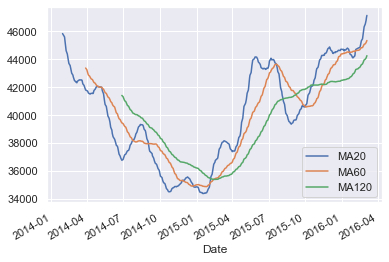

In [105]:
new_gs[['MA20', 'MA60', 'MA120']].plot()

### 문제

10개의 데이터를 만들고 인덱스를 2000/01/01 10개를 만들어 지정하고 3기마다 이동평균값을 구하시오


In [108]:
# win_type = 'box_car'
# wid_type = 'gaussian'

ser = pd.Series(np.random.randn(10), index = pd.date_range('1/1/2000', periods = 10))
ser.rolling(window=5, win_type = 'triang').mean()

2000-01-01         NaN
2000-01-02         NaN
2000-01-03         NaN
2000-01-04         NaN
2000-01-05    0.326049
2000-01-06    0.405917
2000-01-07    0.332795
2000-01-08   -0.012075
2000-01-09   -0.292597
2000-01-10   -0.463114
Freq: D, dtype: float64

In [114]:
dates = pd.DatetimeIndex(['1/1/2018', '1/2/2018', '1/2/2018', '1/2/2018', '1/3/2018'])
dup_ts = pd.Series(np.arange(5), index=dates)
print(dup_ts)
print('이동 후 : ', dup_ts.shift(-2))
print('증감 : ', dup_ts/dup_ts.shift(1)-1)

2018-01-01    0
2018-01-02    1
2018-01-02    2
2018-01-02    3
2018-01-03    4
dtype: int32
이동 후 :  2018-01-01    2.0
2018-01-02    3.0
2018-01-02    4.0
2018-01-02    NaN
2018-01-03    NaN
dtype: float64
증감 :  2018-01-01         NaN
2018-01-02         inf
2018-01-02    1.000000
2018-01-02    0.500000
2018-01-03    0.333333
dtype: float64


In [120]:
df = pd.DataFrame({'a': [1,2,3,4,5,6], 'b': [1,1,2,3,5,8], 'c': [1,4,9,16,25,36]})

print(df.diff())
print('\n축을 열로 : \n', df.diff(axis=1))
print('\n주기 : \n', df.diff(periods=3))
df.head()

     a    b     c
0  NaN  NaN   NaN
1  1.0  0.0   3.0
2  1.0  1.0   5.0
3  1.0  1.0   7.0
4  1.0  2.0   9.0
5  1.0  3.0  11.0

축을 열로 : 
     a    b     c
0 NaN  0.0   0.0
1 NaN -1.0   3.0
2 NaN -1.0   7.0
3 NaN -1.0  13.0
4 NaN  0.0  20.0
5 NaN  2.0  28.0

주기 : 
      a    b     c
0  NaN  NaN   NaN
1  NaN  NaN   NaN
2  NaN  NaN   NaN
3  3.0  2.0  15.0
4  3.0  4.0  21.0
5  3.0  6.0  27.0


,a,b,c
0,1,1,1
1,2,1,4
2,3,2,9
3,4,3,16
4,5,5,25


In [122]:
print(dup_ts['1/1/2018'])
print(dup_ts['1/2/2018'])

grouped = dup_ts.groupby(level = 0)
print(grouped.mean())
print(grouped.count())

dup_ts.index.is_unique

0
2018-01-02    1
2018-01-02    2
2018-01-02    3
dtype: int32
2018-01-01    0
2018-01-02    2
2018-01-03    4
dtype: int32
2018-01-01    1
2018-01-02    3
2018-01-03    1
dtype: int64


False

In [123]:
rng = pd.date_range('1/1/2014', periods=100, freq='D')
ts = pd.Series(np.arange(100), index = rng)
print(ts)
print(ts.groupby(lambda x: x.month).mean())
print(ts.groupby(lambda x: x.weekday).mean())

2014-01-01     0
2014-01-02     1
2014-01-03     2
2014-01-04     3
2014-01-05     4
              ..
2014-04-06    95
2014-04-07    96
2014-04-08    97
2014-04-09    98
2014-04-10    99
Freq: D, Length: 100, dtype: int32
1    15.0
2    44.5
3    74.0
4    94.5
dtype: float64
0    50.5
1    51.5
2    49.0
3    50.0
4    47.5
5    48.5
6    49.5
dtype: float64


In [134]:
data = {'date': ['2014-05-01 18:47:05.069722',
  '2014-05-01 18:47:05.119994', '2014-05-02 18:47:05.178768',
  '2014-05-02 18:47:05.230071', '2014-05-02 18:47:05.230071',
  '2014-05-02 18:47:05.280592', '2014-05-03 18:47:05.332662',
  '2014-05-03 18:47:05.385109', '2014-05-04 18:47:05.436523',
  '2014-05-04 18:47:05.486877'],
        'battle_deaths': [34, 25, 26, 15, 15, 14, 26, 25, 62, 41]}
df = pd.DataFrame(data, columns = ['date', 'battle_deaths'])
print(df)

df['date'] = pd.to_datetime(df['date'])
print(df.info())

df.index = df['date'] # 키가 되고 검색이 빠르고 그룹.
df['2014']
df['2014-05']
df['2014-05-03': '2014-05-04']
df.truncate(after='2014-05-03')
df.groupby(level=0).count()

                         date  battle_deaths
0  2014-05-01 18:47:05.069722             34
1  2014-05-01 18:47:05.119994             25
2  2014-05-02 18:47:05.178768             26
3  2014-05-02 18:47:05.230071             15
4  2014-05-02 18:47:05.230071             15
5  2014-05-02 18:47:05.280592             14
6  2014-05-03 18:47:05.332662             26
7  2014-05-03 18:47:05.385109             25
8  2014-05-04 18:47:05.436523             62
9  2014-05-04 18:47:05.486877             41
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           10 non-null     datetime64[ns]
 1   battle_deaths  10 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 288.0 bytes
None


,date,battle_deaths
date,,
2014-05-01 18:47:05.069722,1,1
2014-05-01 18:47:05.119994,1,1
2014-05-02 18:47:05.178768,1,1
2014-05-02 18:47:05.230071,2,2
2014-05-02 18:47:05.280592,1,1
2014-05-03 18:47:05.332662,1,1
2014-05-03 18:47:05.385109,1,1
2014-05-04 18:47:05.436523,1,1
2014-05-04 18:47:05.486877,1,1


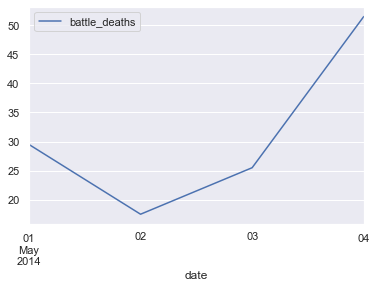

In [135]:
df.resample('D').mean()
df.resample('D').mean().plot()

In [139]:
df = pd.DataFrame({'B': [0,1,2, np.nan, 4]})
df.expanding(2).sum()
df.expanding(3).sum()
df.expanding(4).sum()

,B
0,NaN
1,NaN
2,NaN
3,NaN
4,7.0


In [144]:
product = {'month' : [1,2,3,4,5,6,7,8,9,10,11,12],'demand':[290,260,288,300,310,303,329,340,316,330,308,310]}
df = pd.DataFrame(product)

for i in range(0,df.shape[0]-2):
    df.loc[df.index[i+2],'SMA_3'] = np.round(((df.iloc[i,1]+ df.iloc[i+1,1] +df.iloc[i+2,1])/3),1)
df.head(20) 

,month,demand,SMA_3
0,1,290,NaN
1,2,260,NaN
2,3,288,279.3
3,4,300,282.7
4,5,310,299.3
5,6,303,304.3
6,7,329,314.0
7,8,340,324.0
8,9,316,328.3
9,10,330,328.7


In [152]:
df['pandas_SMA_3'] = df.iloc[:, 1].rolling(window=3).mean()
df.head(20)

,month,demand,SMA_3,pandas_SMA_3
0,1,290,NaN,NaN
1,2,260,NaN,NaN
2,3,288,NaN,279.333333
3,4,300,NaN,282.666667
4,5,310,NaN,299.333333
5,6,303,NaN,304.333333
6,7,329,NaN,314.000000
7,8,340,NaN,324.000000
8,9,316,NaN,328.333333
9,10,330,NaN,328.666667


### 가중 이동 평균법

In [158]:
from pandas_datareader import data

data1 = data.DataReader('GOOG', 'yahoo', start='2008', end='2018')
priceDf = data1['Adj Close']
mov5 = priceDf.rolling(5).mean()
mov20 = priceDf.rolling(20).mean()

In [160]:
def weightedMean(weightArray):
    def inner(X):
        return (weightArray * X).mean()
    return inner

n = 5
t = [v for v in np.arange(1, n+1)]
sumv = sum(t) / n
wts = np.array(t) / sumv
print(wts)

wMov5 = priceDf.rolling(n).apply(weightedMean(wts), raw=True)
print(wMov5)

[0.33333333 0.66666667 1.         1.33333333 1.66666667]
Date
2007-12-31            NaN
2008-01-02            NaN
2008-01-03            NaN
2008-01-04            NaN
2008-01-07     331.826235
                 ...     
2017-12-22    1064.564665
2017-12-26    1061.043327
2017-12-27    1056.425326
2017-12-28    1052.818001
2017-12-29    1049.751343
Name: Adj Close, Length: 2519, dtype: float64


### 지수 이동 평균법(Exponential Moving Average)

In [163]:
eMov5 = priceDf.ewm(span=5).mean()
eMov20 = priceDf.ewm(span=20).mean()

print(eMov5)
print(eMov20)

Date
2007-12-31     344.448914
2008-01-02     342.568970
2008-01-03     342.008335
2008-01-04     335.887622
2008-01-07     331.098702
                 ...     
2017-12-22    1062.235959
2017-12-26    1060.403970
2017-12-27    1056.725978
2017-12-28    1053.863990
2017-12-29    1051.376002
Name: Adj Close, Length: 2519, dtype: float64
Date
2007-12-31     344.448914
2008-01-02     342.803963
2008-01-03     342.283077
2008-01-04     337.949982
2008-01-07     334.433557
                 ...     
2017-12-22    1046.004932
2017-12-26    1047.027319
2017-12-27    1047.250431
2017-12-28    1047.335153
2017-12-29    1047.246093
Name: Adj Close, Length: 2519, dtype: float64


Text(0.5, 1.0, '이동평균법 비교')

C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 51060 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 46041 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 54217 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 44512 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 48277 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 48708 missing from current

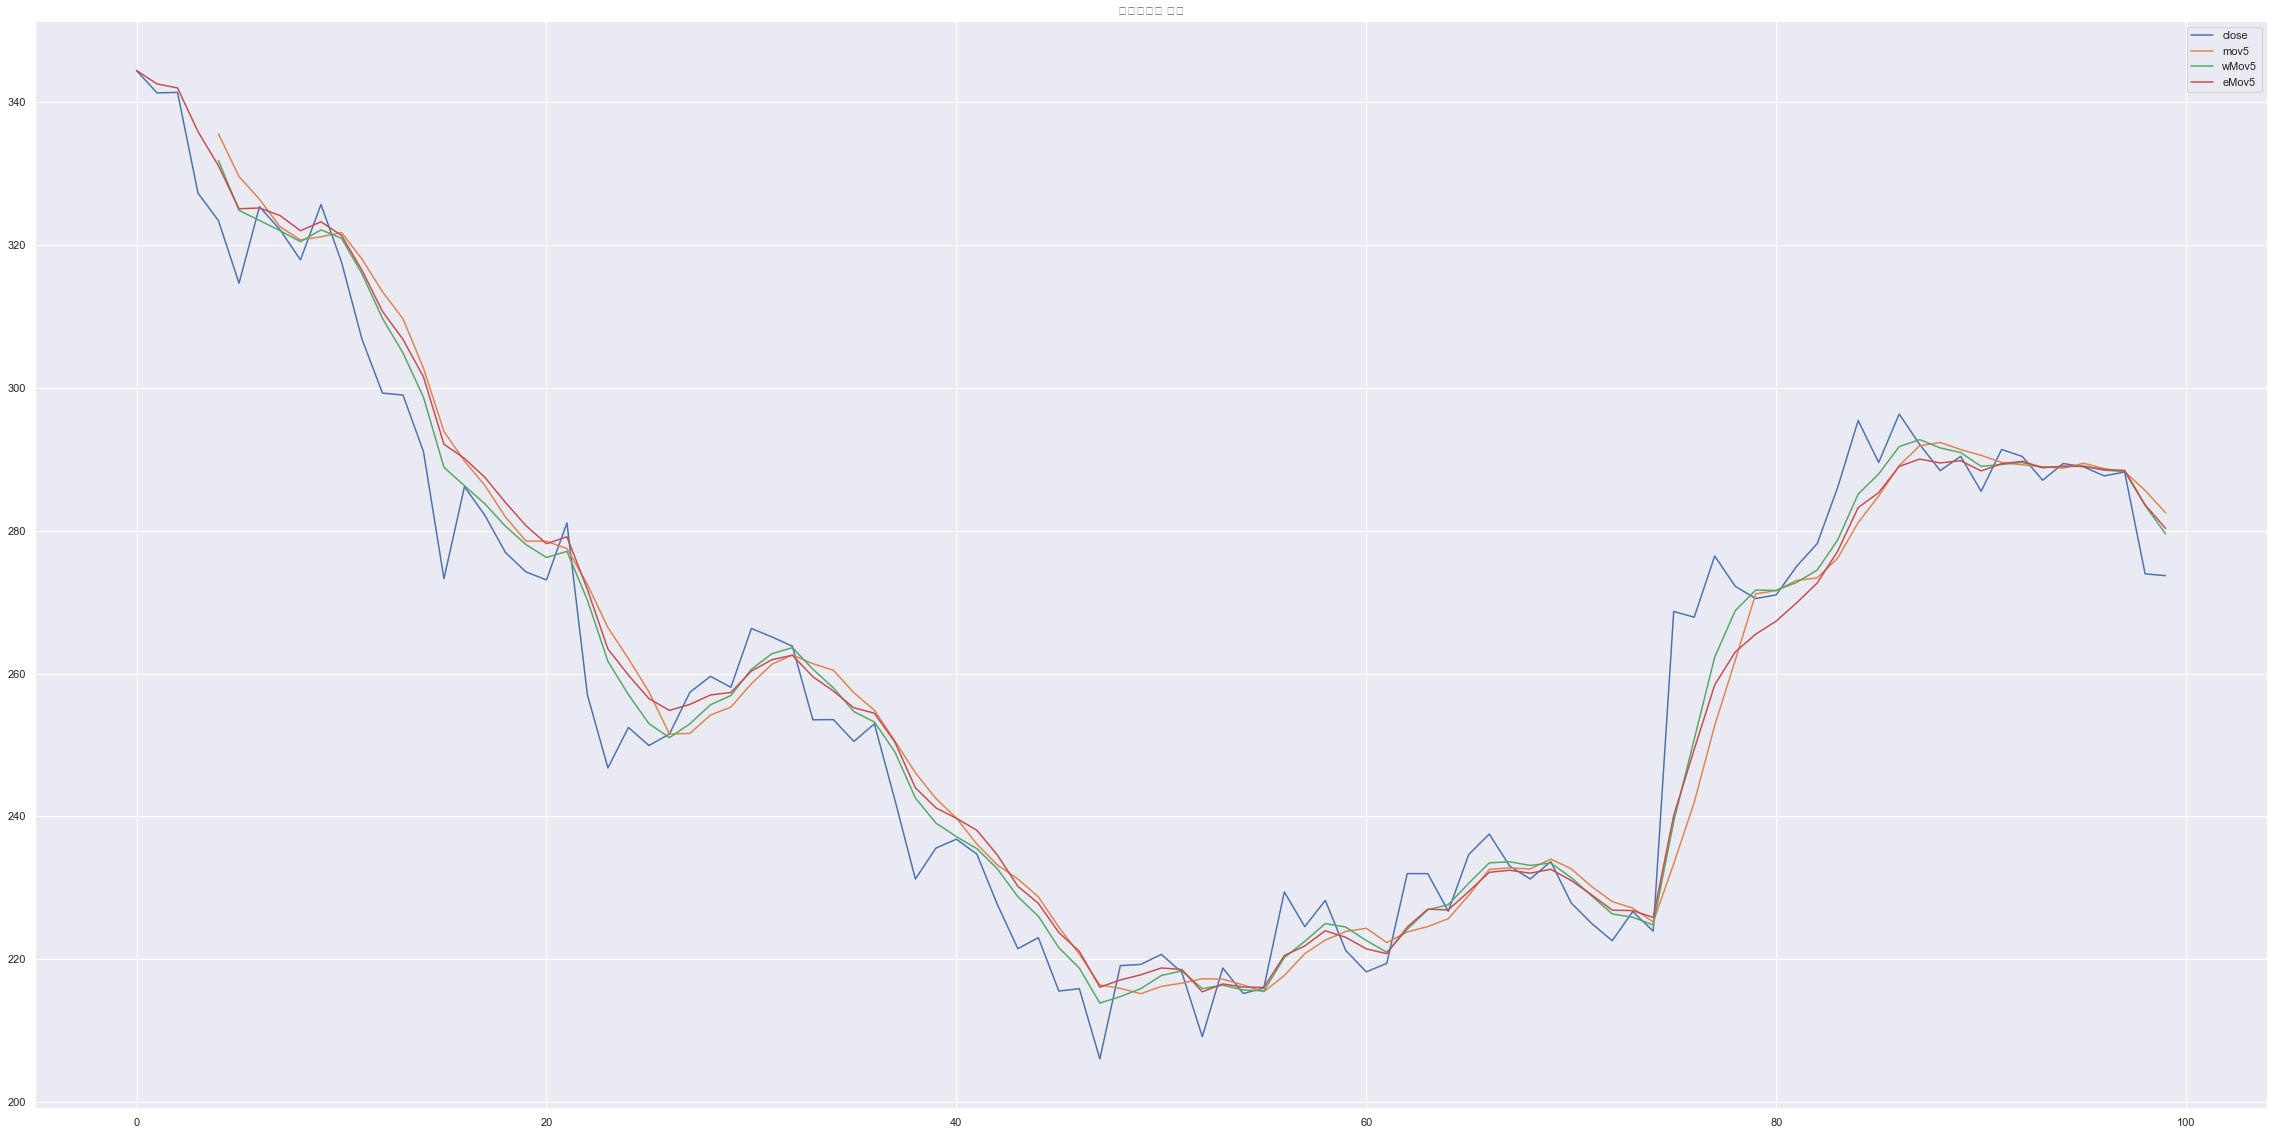

In [165]:
start = 0
end = 100
rindex = pd.RangeIndex(start = start, stop = end)
fig, ax1 = plt.subplots(figsize=[40, 20])
plt.rcParams.update({'font.size':22})
ax1.plot(rindex, data1['Adj Close'].iloc[start:end], label='close')
ax1.plot(rindex, mov5.iloc[start:end], label='mov5')
ax1.plot(rindex, wMov5.iloc[start:end], label='wMov5')
ax1.plot(rindex, eMov5.iloc[start:end], label='eMov5')
plt.legend()
plt.title('이동평균법 비교')

In [170]:
import FinanceDataReader as fdr

df = fdr.DataReader('AAPL', '2017')
df = fdr.DataReader('KS11', '2015')
df = fdr.DataReader('USD/KRW', '2018')
df = fdr.DataReader('BTC/KRW', '2016')
df_krx = fdr.StockListing('KRX')
df_krx = fdr.StockListing('S&P500')

df.head()

,Close,Open,High,Low,Volume,Change
Date,,,,,,
2017-05-23,3206000,3104000,3281000,3081000,21580.0,0.0329
2017-05-24,4175000,3206000,4314000,3206000,34680.0,0.3022
2017-05-25,4199000,4175000,4840000,3102000,35910.0,0.0057
2017-05-26,3227000,4199000,4200000,2900000,36650.0,-0.2315
2017-05-27,3152000,3227000,3288000,2460000,33750.0,-0.0232


In [172]:
tiker_list = ['005930', '066570', '005490']
df_list = [fdr.DataReader(ticker, '2019-04-01', '2019-04-30')['Close'] for ticker in tiker_list]
len(df_list)

3

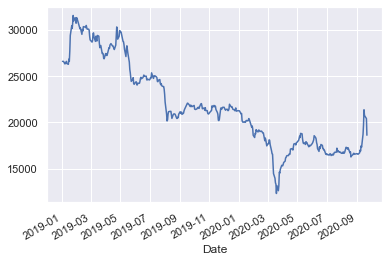

In [178]:
df = pd.read_html('http://kind.krx.co.kr/corpgeneral/corpList.do?method=download&searchType=13', header=0)[0] 

df = fdr.DataReader('267290', '2019')
df.head(10)
df['Close'].plot()

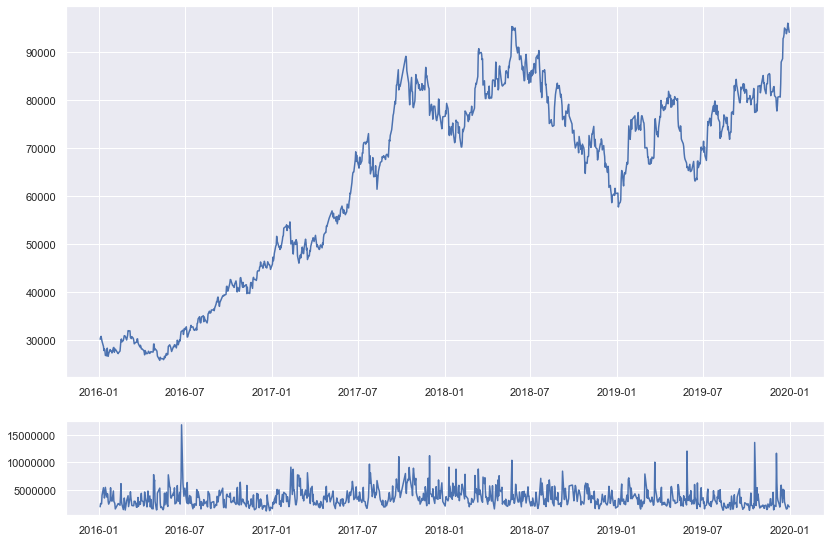

In [182]:
hynix = fdr.DataReader('000660', '2016-01-01', '2019-12-31')
fig = plt.figure(figsize=(12,8))
top_axes = plt.subplot2grid((4,4), (0,0), rowspan=3, colspan=4)
bottom_axes = plt.subplot2grid((4,4), (3,0), rowspan=1, colspan=4)
bottom_axes.get_yaxis().get_major_formatter().set_scientific(False)
top_axes.plot(hynix.index, hynix['Close'], label='Adjusted Close')
bottom_axes.plot(hynix.index, hynix['Volume'])

plt.tight_layout()
plt.show()

In [186]:
import matplotlib.ticker as ticker
import mpl_finance as matfin

start = datetime.datetime(2019,3,1)
end = datetime.datetime(2019,3,31)
hynix = fdr.DataReader('000660', start, end)
hynix.head(10)

C:\Users\user\anaconda3\lib\site-packages\mpl_finance.py:16: DeprecationWarning: 



    Please use `mplfinance` instead (no hyphen, no underscore).

    To install: `pip install --upgrade mplfinance` 

   For more information, see: https://pypi.org/project/mplfinance/


  __warnings.warn('\n\n  ================================================================='+


,Open,High,Low,Close,Volume,Change
Date,,,,,,
2019-03-04,70300,71400,69900,70100,4931703,0.001429
2019-03-05,68300,70000,68300,69700,3465521,-0.005706
2019-03-06,68500,69600,67400,68100,4958303,-0.022956
2019-03-07,67200,68900,67100,68100,3402570,0.000000
2019-03-08,67900,68200,66200,66700,3571792,-0.020558
2019-03-11,67000,67800,66200,66600,2869008,-0.001499
2019-03-12,67700,68600,67500,67700,2753535,0.016517
2019-03-13,67700,67800,65900,66800,2851596,-0.013294
2019-03-14,67400,67400,66400,67300,3107100,0.007485


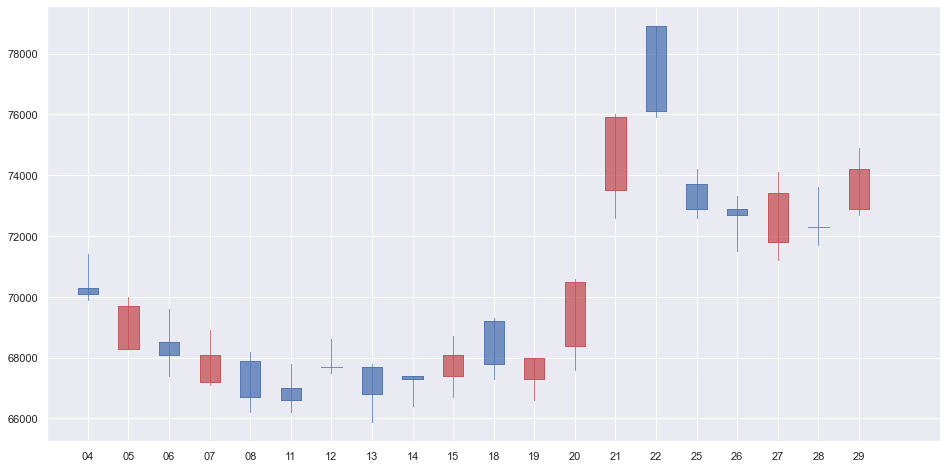

In [189]:
fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(111)
day_list = range(len(hynix))
name_list = []
for day in hynix.index:
    name_list.append(day.strftime('%d'))
    
# 봉차트
ax.xaxis.set_major_locator(ticker.FixedLocator(day_list))
ax.xaxis.set_major_formatter(ticker.FixedFormatter(name_list))

    
matfin.candlestick2_ohlc(ax, hynix['Open'], hynix['High'], hynix['Low'], hynix['Close'],
                        width = 0.5, colorup = 'r', colordown = 'b')
plt.show()

# 데이터 불러오기

In [198]:
data = pd.read_csv('stock_px.csv', parse_dates=True, index_col=0)
data.head()

,AAPL,MSFT,XOM,SPX
2003-01-02,7.40,21.11,29.22,909.03
2003-01-03,7.45,21.14,29.24,908.59
2003-01-06,7.45,21.52,29.96,929.01
2003-01-07,7.43,21.93,28.95,922.93
2003-01-08,7.28,21.31,28.83,909.93


In [199]:
short_rolling = data.rolling(window=20).mean()
short_rolling.head(20)
long_rolling = data.rolling(window=100).mean()
long_rolling.tail()
returns = data.pct_change(1)
returns.head()

,AAPL,MSFT,XOM,SPX
2003-01-02,NaN,NaN,NaN,NaN
2003-01-03,0.006757,0.001421,0.000684,-0.000484
2003-01-06,0.000000,0.017975,0.024624,0.022474
2003-01-07,-0.002685,0.019052,-0.033712,-0.006545
2003-01-08,-0.020188,-0.028272,-0.004145,-0.014086


In [201]:
# 비정상성 -> 정상성 띈 데이터로 변환
log_returns = np.log(data).diff()
log_returns.head()

,AAPL,MSFT,XOM,SPX
2003-01-02,NaN,NaN,NaN,NaN
2003-01-03,0.006734,0.001420,0.000684,-0.000484
2003-01-06,0.000000,0.017816,0.024326,0.022226
2003-01-07,-0.002688,0.018873,-0.034293,-0.006566
2003-01-08,-0.020395,-0.028679,-0.004154,-0.014186


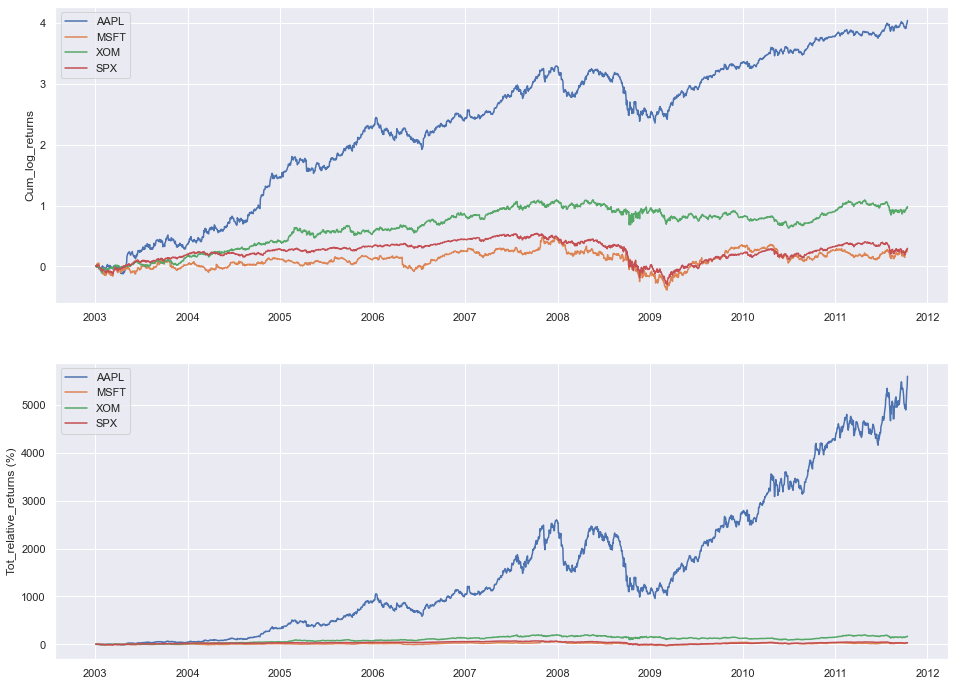

In [204]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 12))
for c in log_returns:
    ax1.plot(log_returns.index, log_returns[c].cumsum(), label=str(c))
ax1.set_ylabel('Cum_log_returns')
ax1.legend(loc='best')
for c in log_returns:
    ax2.plot(log_returns.index, 100*(np.exp(log_returns[c].cumsum())-1), label=str(c))
ax2.set_ylabel('Tot_relative_returns (%)')
ax2.legend(loc='best')
plt.show()

# 문제

### 하이닉스 데이터에 대하여 1년정도 데이터

    - 거래량가 있는 것만을 대상으로
    - 5일 이평, 20일 이평, 60일이평, 120일 이평을 계산하고
    - 원래의 데이터에 추가한 다음
    - 종가 5,20,60,120일 이평선을 시각화 해보시오
    - 지수이동 평균선(10)을 추가하여 시각화 하시오